<a href="https://colab.research.google.com/github/kshivamr/Housing-Price-Predictor/blob/main/Predict_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using kaggle data for pridiction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train shape: ", train_df.shape)
print("Test shape:", test_df.shape)

#Preview
train_df.head(5)


Train shape:  (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


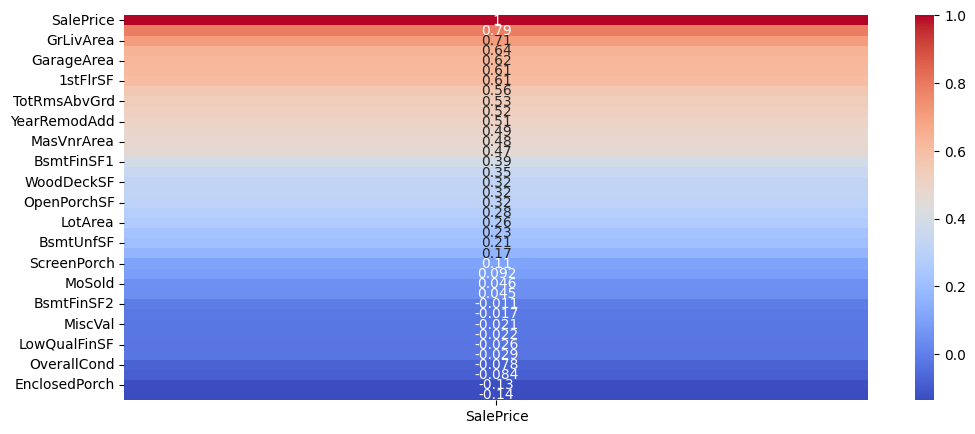

In [ ]:
# Missing values check

print(train_df.isnull().sum().sort_values(ascending= False).head(10))

#correlation heatmap(top correlated with salePrices)

corr = train_df.corr(numeric_only = True)
plt.figure(figsize = (12,5))
sns.heatmap(corr["SalePrice"].sort_values(ascending=False).to_frame(), annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
#if column name is lowercase
if 'Id' in train_df.columns:
  train_df.drop("ID", axis = 1, inplace = True)
elif 'id' in train_df.columns:
  train_df.drop("id", axis = 1, inplace = True)

if 'Id' in test_df.columns:
    test_df.drop("Id", axis=1, inplace=True)
elif 'id' in test_df.columns:
    test_df.drop("id", axis=1, inplace=True)

# Fill missing values (basic approach)
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

# One-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Align train & test (make sure they have same features)
train_df, test_df = train_df.align(test_df, join="left", axis=1)

In [ ]:
#spliting the data set for prdiction

from sklearn.model_selection import train_test_split

X = train_df.drop("SalePrice", axis =1 )
y = train_df["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
#using linear Regression model for prediction

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_vaild, y_pred))
print("Linear Regression RMSE: "), rmse

Linear Regression RMSE: 


(None, np.float64(65416.59360687192))

In [ ]:
# using other models to predict

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_rf)))

gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_valid)
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_gb)))


Random Forest RMSE: 28840.331458932655
Gradient Boosting RMSE: 26655.444159212562
